#  <font color='gray'>PYScreening</font>
## <font color='gray'>1. Introduction:</font>
### <font color='purple'>Welcome to the repository for our latest project on virtual screening of small molecules using Lipinski's Rule of Five. The goal of this project is to develop a pipeline for filtering large sets of molecules based on Lipinski's rule, a widely used guideline for predicting oral bioavailability of drug candidates. The pipeline includes reading in a list of SMILES strings, converting them to RDKit molecules, applying Lipinski's rule, and saving the filtered molecules in both CSV and SDF formats. The repository contains the complete source code, documentation, and examples for reproducing the results. We hope that this work will be useful for researchers in the field of drug discovery and computational chemistry.</font>

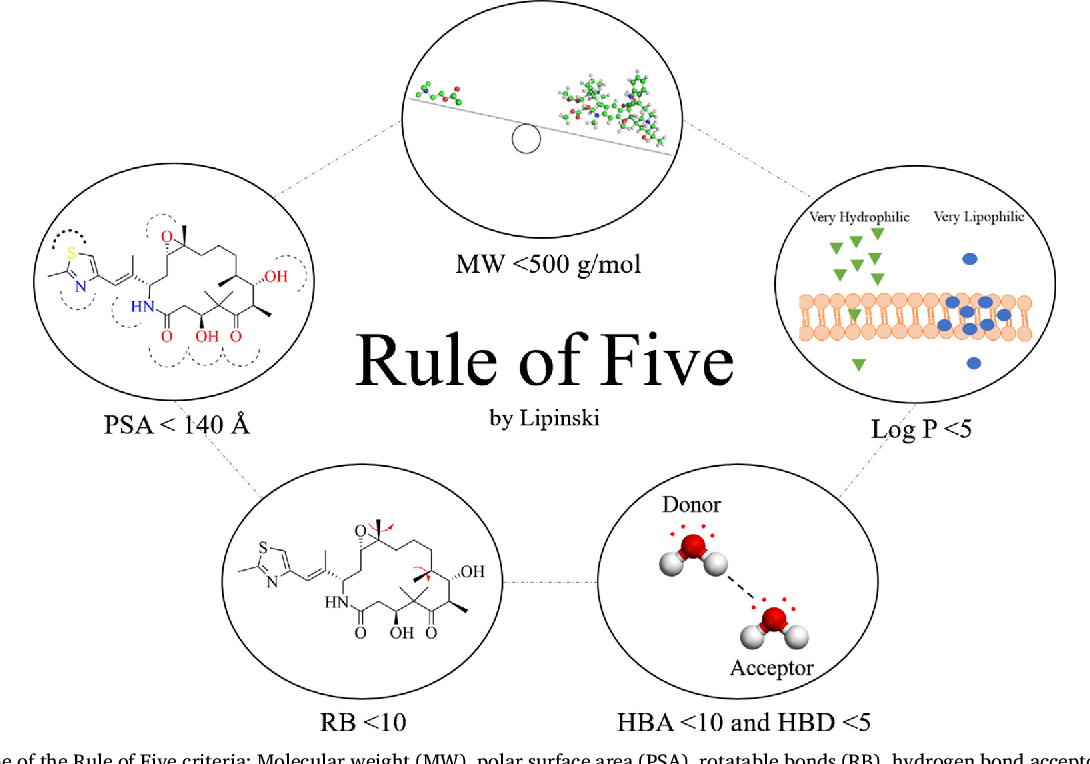

*Picture Courtesy:Chagas, C. M., Moss, S., & Alisaraie, L. (2018). Drug metabolites and their effects on the development of adverse reactions: Revisiting Lipinski’s Rule of Five. International journal of pharmaceutics, 549(1-2), 133-149.*

## <font color='gray'>2. Description of the python codes below (step-1):</font>
### <font color='purple'>This code is a python script that performs virtual screening of small molecules using Lipinski's Rule of Five. The script is composed of several parts:</font>
###  <font color='purple'>Importing necessary modules: The script starts by importing the csv module for reading and writing CSV files, the rdkit module for working with chemical compounds, and the Lipinski and Descriptors submodules from the rdkit.Chem module.</font>

   > <font color='green'>1. Reading in the SMILES from a CSV file: The script uses the "open" function to open a CSV file named "smiles.csv" in read mode and assigns it to a variable "f". The csv.reader function is used to read the contents of the file and assign it to the variable "reader". The script then uses a list comprehension to extract the first column of the CSV file and assigns it to the variable "smiles_list". This list contains the SMILES strings of the molecules that we want to screen.</font>

   > <font color='green'>2. Converting SMILES to RDKit molecules: The script then uses a list comprehension to convert the SMILES strings in "smiles_list" to RDKit molecules using the Chem.MolFromSmiles function. The list comprehension also includes a check to make sure that the returned molecule is not None, which would indicate that the SMILES string was invalid. The resulting list of molecules is assigned to the variable "mols".</font>

   > <font color='green'>3. Filtering molecules based on Lipinski's Rule of Five: The script then uses another list comprehension to filter the molecules in "mols" based on Lipinski's Rule of Five. Lipinski's Rule of Five is a guideline for predicting oral bioavailability of drug candidates. It states that a compound should have no more than 5 hydrogen bond donors, no more than 10 hydrogen bond acceptors, a molecular weight less than or equal to 500, and a calculated logP value less than or equal to 5. The script uses the NumHDonors, NumHAcceptors, MolWt, and MolLogP functions from the Lipinski and Descriptors submodules to calculate these properties for each molecule in "mols" and checks if they meet the criteria. The resulting list of filtered molecules is assigned to the variable "filtered_mols".</font>

   > <font color='green'>4. Saving the filtered molecules in a CSV file: The script then uses the "open" function to open a CSV file named "filtered_molecules.csv" in write mode and assigns it to the variable "f". The csv.writer function is used to write the contents of the "filtered_mols" list to the file. The script then uses a for loop to iterate over the molecules in "filtered_mols" and convert them to SMILES strings using the Chem.MolToSmiles function before writing them to the file.</font>

   > <font color='green'>5. Printing the number of screened molecules: Finally, the script uses the "len" function to calculate the number of filtered molecules and prints the result using the "print" function, which gives us an idea of how many molecules passed the screening process.</font>

**This script is useful for researchers in the field of drug discovery and computational chemistry who want to screen a large set of molecules for their potential as drug candidates using Lipinski's Rule of Five. By using this script, you can quickly filter out molecules that do not meet the criteria and focus on the ones that have a higher chance of being orally bioavailable.**

In [11]:
import csv
from rdkit import Chem
from rdkit.Chem import Lipinski, Descriptors

# read in the SMILES from CSV file
with open("smiles.csv", 'r') as f:
    reader = csv.reader(f)
    smiles_list = [row[0] for row in reader]

mols = [mol for mol in (Chem.MolFromSmiles(smi) for smi in smiles_list) if mol is not None]

# Filter molecules based on Lipinski's Rule of Five
filtered_mols = [mol for mol in mols if Lipinski.NumHDonors(mol) <= 5 and Lipinski.NumHAcceptors(mol) <= 10 and Descriptors.MolWt(mol) <= 500 and Descriptors.MolLogP(mol) <= 5]

# save the filtered molecules in CSV file
with open("filtered_molecules.csv", "w") as f:
    writer = csv.writer(f)
    for mol in filtered_mols:
        writer.writerow([Chem.MolToSmiles(mol)])

print("Number of screened molecules: ", len(filtered_mols))


Number of screened molecules:  435


## <font color='gray'>2. Description of the python codes below (step-2):</font>
### <font color='purple'>This code is a python script that creates a folder named "Screened_Molecules_3D" and saves the filtered molecules from the previous script in the SDF format. The script is composed of several parts:</font>

   ><font color='green'>1. Importing the os module: The script starts by importing the os module, which provides a portable way of using operating system dependent functionality like reading or writing to files, creating or removing directories etc.</font>

   ><font color='green'>2. Creating a folder to store the SDF files: The script uses the os.path.exists() function to check if a folder named "Screened_Molecules_3D" already exists in the current working directory. If it does not exist, the script uses os.makedirs() function to create the folder.</font>

   ><font color='green'>3. Saving the filtered molecules in SDF format: The script then uses a for loop to iterate over the filtered molecules from previous script, "filtered_mols" and enumerates them. It uses the "with open" statement to open a file with the name "mol_i.sdf" where i is the index of the molecule in the filtered_mols list, in write mode and assigns it to the variable "f". The Chem.MolToMolBlock function is used to convert the molecules to the SDF format, and the f.write() function is used to write the SDF block to the file.</font>

   ><font color='green'>4. Saving the SDF files in the created folder: The script uses the string formatting to save the SDF files in the created folder "Screened_Molecules_3D" with the names "mol_i.sdf" where i is the index of the molecule in the filtered_mols list.</font>

**This script is useful for researchers in the field of drug discovery and computational chemistry who want to save their filtered molecules in 3D format, SDF format which can be used in various applications like molecular visualization, 3D-QSAR etc. By using this script, you can quickly convert the filtered molecules to SDF format and store them in a specific folder for future use.**

In [12]:
import os
# Create the folder to store the SDF files
if not os.path.exists("Screened_Molecules_3D"):
    os.makedirs("Screened_Molecules_3D")

# Convert filtered molecules to SDF format and save in the created folder
for i, mol in enumerate(filtered_mols):
    with open(f"Screened_Molecules_3D/mol_{i}.sdf", "w") as f:
        f.write(Chem.MolToMolBlock(mol))


*contact me@: rikgangulybioinfo@gmail.com,
Computational Biology Laboratory,
North-Eastern Hill University,
Shillong, India.*